In [31]:
import pandas as pd
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

pandas is used for plotting
random is used for generating random values in the arrays to be used

In [32]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [33]:
def heapsort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[left] > arr[largest]:
        largest = left

    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

In [34]:

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    lesser = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quicksort(lesser) + equal + quicksort(greater)

In [35]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

In [36]:
def generate_array(size):
    return [random.randint(1, 1000) for _ in range(size)]


In [50]:

array_sizes = list(range(5, 6000, 1))
data = {'Array Size': [], 'Heap Sort Time': [], 'Merge Sort Time': [], 'Quick Sort Time': [], 'Insertion Sort Time': []}

for size in array_sizes:
    array = generate_array(size)

    start_time = time.perf_counter()
    heapsort(array.copy())
    heap_sort_time = time.perf_counter() - start_time

    start_time = time.perf_counter()
    merge_sort(array.copy())
    merge_sort_time = time.perf_counter() - start_time

    start_time = time.perf_counter()
    quicksort(array.copy())
    quick_sort_time = time.perf_counter() - start_time

    start_time = time.perf_counter()
    insertion_sort(array.copy())
    insertion_sort_time = time.perf_counter() - start_time

    data['Array Size'].append(size)
    data['Heap Sort Time'].append(heap_sort_time)
    data['Merge Sort Time'].append(merge_sort_time)
    data['Quick Sort Time'].append(quick_sort_time)
    data['Insertion Sort Time'].append(insertion_sort_time)

df = pd.DataFrame(data)
df.to_csv('sorting_times.csv', index=False)


In [43]:
df = pd.read_csv('sorting_times.csv')

In [44]:
df

,Array Size,Heap Sort Time,Merge Sort Time,Quick Sort Time,Insertion Sort Time
0,5,0.000022,0.000018,0.000023,0.000006
1,10,0.000036,0.000035,0.000035,0.000016
2,15,0.000063,0.000058,0.000057,0.000030
3,20,0.000093,0.007077,0.000139,0.000048
4,25,0.000122,0.000102,0.000107,0.000063
...,...,...,...,...,...
194,975,0.004291,0.002717,0.002106,0.035729
195,980,0.004382,0.002717,0.001793,0.034548
196,985,0.006472,0.005427,0.002010,0.038574
197,990,0.004412,0.002713,0.001900,0.037483


In [45]:
array_size = df['Array Size']
heap_sort_time = df['Heap Sort Time']
merge_sort_time = df['Merge Sort Time']
quick_sort_time = df['Quick Sort Time']
insertion_sort_time = df['Insertion Sort Time']

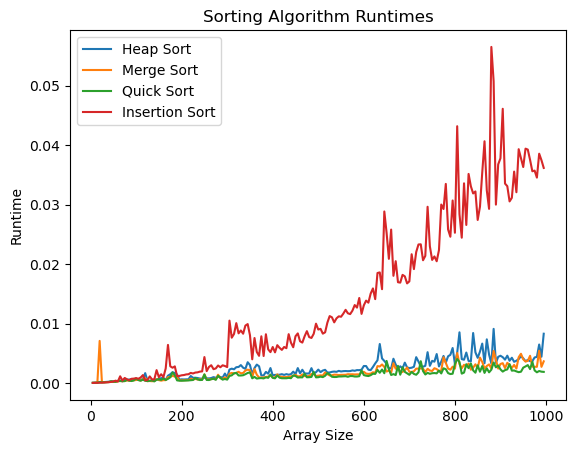

In [46]:
plt.plot(array_size, heap_sort_time, label='Heap Sort')
plt.plot(array_size, merge_sort_time, label='Merge Sort')
plt.plot(array_size, quick_sort_time, label='Quick Sort')
plt.plot(array_size, insertion_sort_time, label='Insertion Sort')
plt.xlabel('Array Size')
plt.ylabel('Runtime')
plt.title('Sorting Algorithm Runtimes')
plt.legend()
plt.show()

*Result analysis*

As seen from the line graph:
- insertion sort takes the most time to sort an array
- Heap sort comes in second in the list
- Merge sort takes the secon list time
- quick sort takes the least time among the four